# Échantillonnage direct de l’espace des motifs

Bernoud - Bouaddi - Martineau - Ouhssaine

In [1]:
import pandas as pd
import numpy as np
import random as rd

### Question 1 : Algorithme d’échantillonnage des motifs fréquents

In [2]:
def poids1(ligne):
    return 2**len(ligne)

In [3]:
def txt_to_list(data, n, poids = poids1):
    tab_ligne = []
    tab_poids = []
    for i in range (n):
        ligne = data.readline()
        tmp = np.array(ligne.strip(" \n").split(" "))
        tab_ligne.append(tmp)
        tab_poids.append(poids1(tmp))
    return tab_ligne, tab_poids

In [4]:
def read_file(data_name):
    data = open(data_name)
    n = len(data.readlines())
    data = open(data_name)
    return n,data

In [5]:
def frequency_draw(ligne):
    motif = []
    for i in range(len(ligne)):
        r = rd.randint(0,1)
        if r == 1 :
            motif.append(ligne[i])
    return motif

In [6]:
def tirage_motif(tab_ligne, tab_poids, fonction_tirage = frequency_draw):
    ligne = rd.choices(tab_ligne, tab_poids,k=1)
    ligne = ligne[0]
    return fonction_tirage(ligne)

In [7]:
def frequency_sample(data_name):
    n,data=read_file(data_name)
    tab_ligne,tab_poids = txt_to_list(data, n)
    motif_tire = tirage_motif(tab_ligne, tab_poids, frequency_draw)
    return motif_tire

In [8]:
k=100
tab_motif_freq = []
for i in range(k):
    tab_motif_freq.append(frequency_sample("test.txt"))

### Question 2 : Algorithme d’échantillonnage basé sur l’aire.

In [9]:
def poids2(ligne): # Fonction de poids selon l'aire
    return len(ligne)*2**(len(ligne)-1)

In [10]:
def area_draw(ligne): # Fonction de tirage selon l'aire
    motif = []
    k = rd.choices(np.arange(len(ligne))+1, np.arange(len(ligne))+1, k = 1)[0]
    motif=np.random.choice(ligne,k,False) 
    motif.sort()
    motif = list(motif)
    return motif

In [11]:
def area_sample(data_name):
    n,data=read_file(data_name)
    tab_ligne,tab_poids = txt_to_list(data, n, poids2)
    motif_tire = tirage_motif(tab_ligne, tab_poids, area_draw)
    return motif_tire

In [12]:
k=100
tab_motif_area = []
for i in range(k):
    tab_motif_area.append(area_sample("test.txt"))

### Question 3 : Valeurs réelles de la fréquence et / ou l’aire en une seule passe sur les données.

In [13]:
def motif_in_line(motif,ligne):
    for i in range (len(motif)):
        if motif[i] not in ligne:
            return False
    return True


In [14]:
def freq_motif(tab_motif,tab_ligne):
    tab_freq=[]
    for i in range(len(tab_motif)):
        freq=0
        for j in range(len(tab_ligne)):
            freq+=motif_in_line(tab_motif[i],tab_ligne[j])
        tab_freq.append(freq)
    return tab_freq

In [15]:
def area_motif(tab_motif,tab_freq):
    tab_area=[]
    for i in range(len(tab_freq)):
        tab_area.append(tab_freq[i]*len(tab_motif[i]))
    return tab_area

In [16]:
def find_freq_area(tab_motif,data_name):
    n,data=read_file(data_name)
    tab_ligne,tab_poids = txt_to_list(data, n)
    tab_freq=freq_motif(tab_motif,tab_ligne)
    tab_area=area_motif(tab_motif,tab_freq)
    return tab_freq,tab_area

In [17]:
tab_freq,tab_area=find_freq_area(tab_motif_freq,"test.txt")

### Question 4 : Test sur l'échantillon chess.txt

In [18]:
k=100
tab_motif_freq = []
for i in range(k):
    tab_motif_freq.append(frequency_sample("chess.txt"))


In [19]:
k=100
tab_motif_area = []
for i in range(k):
    tab_motif_area.append(area_sample("chess.txt"))


In [20]:
tab_freq,tab_area=find_freq_area(tab_motif_freq,"chess.txt")

### Question 5 : Etude empirique

In [21]:
def enlever_doublons(tab_motif):
    output = []
    for x in tab_motif:
        if x not in output:
            output.append(x)
    return (output)

In [22]:
def compter_doublons(tab, tab_motif):
    score = []
    for x in tab_motif:
        a = tab.count(x)
        score.append(a)
    return score
    

In [23]:
k = 4000
tab_motif_freq = []
tab_motif_area = []
for i in range(k):
    tab_motif_freq.append(frequency_sample("test.txt"))
    tab_motif_area.append(area_sample("test.txt"))
tab_motif_freq2 = enlever_doublons(tab_motif_freq)
tab_motif_area2 = enlever_doublons(tab_motif_area)
tab_freq_reelle1, tab_area = find_freq_area(tab_motif_freq2, "test.txt")
tab_freq_reelle2, tab_area = find_freq_area(tab_motif_area2, "test.txt")
tab_freq_empirique1 = compter_doublons(tab_motif_freq, tab_motif_freq2)
tab_area_empirique2 = compter_doublons(tab_motif_area, tab_motif_area2)

<BarContainer object of 32 artists>

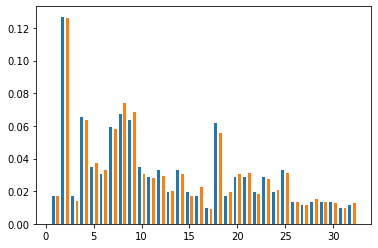

In [24]:
import matplotlib.pyplot as plt
x = np.arange(1,len(tab_freq_reelle1)+1)
plt.bar(x-0.25, np.array(tab_freq_reelle1)/sum(tab_freq_reelle1), 0.3)
plt.bar(x+0.25, np.array(tab_freq_empirique1)/sum(tab_freq_empirique1), 0.3)

31


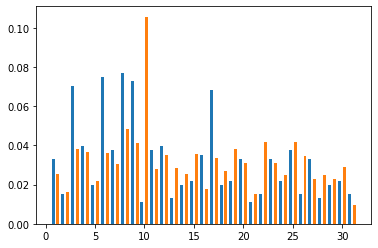

In [25]:
x = np.arange(1,len(tab_freq_reelle2)+1)
plt.bar(x-0.25, np.array(tab_freq_reelle2)/sum(tab_freq_reelle2), 0.3)
plt.bar(x+0.25, np.array(tab_area_empirique2)/sum(tab_area_empirique2), 0.3)
print(len(tab_area_empirique2))